## Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. 

Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.


## 1) Get familiar with data

In [1]:
import pandas as pd

In [3]:
cd ../../Data/challenge/

/home/dsc/Data/challenge


In [4]:
ls -l

total 1018820
-rwxr-x--- 1 dsc dsc 554970628 mar 13  2018 bookings.csv.bz2*
-rw-r--r-- 1 dsc dsc   4232732 ene 25 17:53 bookings_sample.csv
-rwxrwxrwx 1 dsc dsc    535893 ene 25 17:18 bookings_sample.csv.bz2*
-rwxr-x--- 1 dsc dsc 483188920 mar 13  2018 searches.csv.bz2*
-rwxrwxrwx 1 dsc dsc    244720 ene 25 17:19 searches_sample.csv.bz2*
-rw-r--r-- 1 dsc dsc     80140 ene 25 21:22 top_airports.csv


In [5]:
s=pd.read_csv('./searches_sample.csv.bz2', sep='^')
#s=pd.read_csv('./searches.csv.bz2', sep='^', nrows=10000)


In [6]:
s.sample(5)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
1079,2013-01-02,00:34:29,CAL,cb028e2166a95168fee7d483a463ae54,DE,MUC,BLQ,1,2,MUC,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
7755,2013-01-08,08:53:17,MPT,788e52ddaa551032c69ba37cc316233f,FR,DKR,BES,0,1,DKR,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR
9289,2013-01-10,17:27:24,MPT,b695299cc14ddcd1e31f1c922b3e258c,US,EWR,BZE,1,2,EWR,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,SJC
722,2013-01-01,16:22:49,MPT,909e0b385888f1305839025d209a5a93,GB,BOH,FAO,1,2,BOH,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,LON
4571,2013-01-05,00:02:52,MPT,77f83f983d7f1236f0beedff2410c509,GB,LON,DEL,1,2,LON,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,LON


In [7]:
pd.set_option('display.max_columns', None)

In [8]:
s.sample(5)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
1438,2013-01-02,12:36:08,FFP,5e27c9ae4f31183dbdee907984cbee32,CH,ZRH,HAM,1,2,ZRH,HAM,2013-03-15,7U,NaN,HAM,ZRH,2013-03-18,7U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,ZRH
7188,2013-01-08,17:17:56,FCP,3565e31495ecfd46fa018339d20382b1,SA,RUH,EAM,0,1,RUH,EAM,2013-01-15,KP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,JED
2151,2013-01-03,08:11:39,MTP,e41c9d833aa74600552f2ed688b67d81,AT,VIE,AMS,1,2,VIE,AMS,2013-04-04,NaN,NaN,AMS,VIE,2013-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,VIE
1255,2013-01-02,21:05:50,FXA,4014b98b900d9d8620abcfce2028e66d,NO,SVG,OSL,1,3,SVG,OSL,2013-01-08,DU,C,OSL,LHR,2013-01-09,LK,J,LGW,SVG,2013-01-10,NJ,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,b720315752f6f549c6266baa20303354,OSL
7190,2013-01-08,17:46:37,MPT,03a4fc8b3cd31d6d5b5d7b86d20f4af8,DE,SBZ,STR,0,1,SBZ,STR,2013-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,LEJ


In [9]:
s.describe()

,RoundTrip,NbSegments,IsPublishedForNeg,IsFromInternet,IsFromVista
count,9999.000000,9999.000000,9999.0,9999.0,9999.0
mean,0.700670,1.833583,0.0,0.0,0.0
std,0.457987,0.731857,0.0,0.0,0.0
min,0.000000,1.000000,0.0,0.0,0.0
25%,0.000000,1.000000,0.0,0.0,0.0
50%,1.000000,2.000000,0.0,0.0,0.0
75%,1.000000,2.000000,0.0,0.0,0.0
max,1.000000,9.000000,0.0,0.0,0.0


In [10]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 45 columns):
Date                 9999 non-null object
Time                 9999 non-null object
TxnCode              9999 non-null object
OfficeID             9999 non-null object
Country              9999 non-null object
Origin               9999 non-null object
Destination          9999 non-null object
RoundTrip            9999 non-null int64
NbSegments           9999 non-null int64
Seg1Departure        9999 non-null object
Seg1Arrival          9999 non-null object
Seg1Date             9972 non-null object
Seg1Carrier          4047 non-null object
Seg1BookingCode      1143 non-null object
Seg2Departure        7195 non-null object
Seg2Arrival          7195 non-null object
Seg2Date             7160 non-null object
Seg2Carrier          2870 non-null object
Seg2BookingCode      998 non-null object
Seg3Departure        534 non-null object
Seg3Arrival          534 non-null object
Seg3Date        

In [12]:
s.shape

(9999, 45)

In [15]:
list(s.columns)

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

## 2) Select the columns of interest

Date, Destination

In [16]:
s=pd.read_csv('./searches_sample.csv.bz2', sep='^', usecols=['Date', 'Destination'])


In [17]:
s.head()

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD


## 3) What to do with NaN

In [18]:
s=pd.read_csv('./searches_sample.csv.bz2', sep='^', usecols=['Date', 'Destination'])
s=s.dropna()

## 4) Make action plan


1. filtrar solo MAD, AGP, BCN
2. create column "year-month"
3. group by airport, "year-month"
4. sumar searches
5. plot


In [19]:
s.head()

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD


### 4.1) filter out the the searches for MAD, BCN, AGP
take only the rows having MAD, BCN or AGP as destination

In [20]:
s=pd.read_csv('./searches_sample.csv.bz2', sep='^', usecols=['Date', 'Destination'])
s=s.dropna()


In [21]:
s[ (s['Destination']=='MAD') | (s['Destination']=='AGP') |(s['Destination']=='BCN')    ].head()

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD


In [22]:
s[ s['Destination'].isin(['MAD', 'AGP', 'BCN'])     ].head()

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD


### 4.2.1) Adding new column with YYYY-MM info

What do we have so far?

In [23]:
s=pd.read_csv('./searches_sample.csv.bz2', sep='^', usecols=['Date', 'Destination'])
s=s.dropna()
s=s[ s['Destination'].isin(['MAD', 'AGP', 'BCN'])     ]

In [26]:
s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 4 to 9950
Data columns (total 2 columns):
Date           335 non-null object
Destination    335 non-null object
dtypes: object(2)
memory usage: 7.9+ KB


we cannot use date function on 'date' column as it is string
need to get month out of date... smth like year-month


### 4.2.1.1a transofming string to date with parse_dates:

In [27]:
s=pd.read_csv('./searches_sample.csv.bz2', sep='^', usecols=['Date', 'Destination'], parse_dates=['Date'])
s=s.dropna()
s=s[ s['Destination'].isin(['MAD', 'AGP', 'BCN'])     ]

In [28]:
s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 4 to 9950
Data columns (total 2 columns):
Date           335 non-null datetime64[ns]
Destination    335 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 7.9+ KB


In [32]:
s['Date'].iloc[0].month

1

### 4.2.1.1b transofming string to date with pandas to_datetime():

In [35]:
s=pd.read_csv('./searches_sample.csv.bz2', sep='^', usecols=['Date', 'Destination'])
s=s.dropna()
s=s[ s['Destination'].isin(['MAD', 'AGP', 'BCN'])    ]

In [36]:
pd.to_datetime(s['Date'].iloc[0])

Timestamp('2013-01-01 00:00:00')

In [37]:
s['Date2']=pd.to_datetime(s['Date'])

In [38]:
s.head()

,Date,Destination,Date2
4,2013-01-01,MAD,2013-01-01
93,2013-01-01,AGP,2013-01-01
113,2013-01-01,BCN,2013-01-01
147,2013-01-01,AGP,2013-01-01
151,2013-01-01,MAD,2013-01-01


In [39]:
s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 4 to 9950
Data columns (total 3 columns):
Date           335 non-null object
Destination    335 non-null object
Date2          335 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 10.5+ KB


### 4.2.1.2 using string and obtainig yyyy-mm directly from it

In [40]:
s=pd.read_csv('./searches_sample.csv.bz2', sep='^', usecols=['Date', 'Destination'])
s=s.dropna()
s=s[ s['Destination'].isin(['MAD', 'AGP', 'BCN'])    ]


In [45]:
s['Year-Month']=s['Date'].str[0:7]

In [46]:
s.head()

,Date,Destination,Year-Month
4,2013-01-01,MAD,2013-01
93,2013-01-01,AGP,2013-01
113,2013-01-01,BCN,2013-01
147,2013-01-01,AGP,2013-01
151,2013-01-01,MAD,2013-01


In [47]:
del s['Date']

In [48]:
s.head()

,Destination,Year-Month
4,MAD,2013-01
93,AGP,2013-01
113,BCN,2013-01
147,AGP,2013-01
151,MAD,2013-01


### 4.2) group by arr_port and month


What do we have so far?

In [69]:
s=pd.read_csv('./searches_sample.csv.bz2', sep='^', usecols=['Date', 'Destination'])
s=s.dropna()
s=s[ s['Destination'].isin(['MAD', 'AGP', 'BCN'])    ]
s['Year-Month']=s['Date'].str[0:7]
del s['Date']

In [50]:
s.head()

,Destination,Year-Month
4,MAD,2013-01
93,AGP,2013-01
113,BCN,2013-01
147,AGP,2013-01
151,MAD,2013-01


In [71]:
s_grouped=s.groupby(['Destination', 'Year-Month']).count()


In [72]:
s_grouped

,
Destination,Year-Month
AGP,2013-01
BCN,2013-01
MAD,2013-01


To get the number of elements of each group we have to use size() as we dont have a column in which we could do count

In [59]:
s_grouped.size().reset_index()

,Destination,Year-Month,0
0,AGP,2013-01,48
1,BCN,2013-01,162
2,MAD,2013-01,125


If we add a column with filled with 1 we can use count

In [60]:
s=pd.read_csv('./searches_sample.csv.bz2', sep='^', usecols=['Date', 'Destination'])
s=s.dropna()
s=s[ s['Destination'].isin(['MAD', 'AGP', 'BCN'])    ]
s['Year-Month']=s['Date'].str[0:7]
del s['Date']
s['Searches']=1

In [62]:
s.head()

,Destination,Year-Month,Searches
4,MAD,2013-01,1
93,AGP,2013-01,1
113,BCN,2013-01,1
147,AGP,2013-01,1
151,MAD,2013-01,1


In [63]:
s_grouped=s.groupby(['Destination', 'Year-Month'])

In [65]:
s_grouped.count()

,,Searches
Destination,Year-Month,
AGP,2013-01,48
BCN,2013-01,162
MAD,2013-01,125


## 4.3 Plotting

What do we have so far?

In [73]:
#s=pd.read_csv('./searches_sample.csv.bz2', sep='^', usecols=['Date', 'Destination'])
s=pd.read_csv('./searches.csv.bz2', sep='^', usecols=['Date', 'Destination'], nrows=100000)
s=s.dropna()
s=s[ s['Destination'].isin(['MAD', 'AGP', 'BCN'])    ]
s['Year-Month']=s['Date'].str[0:7]
del s['Date']
s['Searches']=1
s_grouped=s.groupby(['Destination', 'Year-Month'])
s_grouped=s_grouped.count().reset_index()

In [74]:
s_grouped.head()

,Destination,Year-Month,Searches
0,AGP,2013-01,169
1,AGP,2013-02,147
2,AGP,2013-03,187
3,AGP,2013-04,31
4,BCN,2013-01,517


In [75]:
#A=s_grouped.pivot(x, lines_in_graph ,y)
A=s_grouped.pivot("Year-Month", "Destination","Searches")

In [78]:
print(A)

Destination  AGP  BCN  MAD
Year-Month                
2013-01      169  517  425
2013-02      147  497  400
2013-03      187  536  433
2013-04       31  174  147


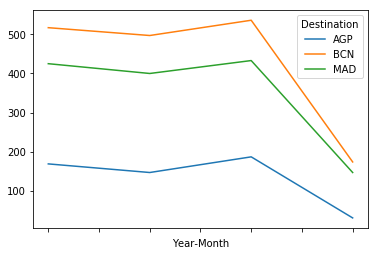

In [77]:
A.plot()

## 4.3.b Step by Step plotting

In [ ]:
1) do list of monthly search values for each City
2) make list of months

In [ ]:
s_grouped[s_grouped['Destination']=='AGP'].reset_index()['Searches']

In [ ]:
list(s_grouped[s_grouped['Destination']=='AGP'].reset_index()['Searches'])

In [ ]:
agp=list(s_grouped[s_grouped['Destination']=='AGP'].reset_index()['Searches'])
mad=list(s_grouped[s_grouped['Destination']=='MAD'].reset_index()['Searches'])
bcn=list(s_grouped[s_grouped['Destination']=='BCN'].reset_index()['Searches'])

In [ ]:
plotdate=list(s_grouped.reset_index()['Month'].unique())

In [ ]:
import numpy as np
fig=plt.figure() 
#fig.set_size_inches(12,6) 

ax = plt.gca() #get current axes
#.add_subplot(1,1,1)  
plt.xlabel("Date")
plt.ylabel("Searches")
#plt.xticks(range(len(plotdate)), plotdate,size='small')
plt.xticks(range(len(plotdate)), plotdate)

major_ticks = range(len(plotdate))                                             
minor_ticks = np.arange(0, len(plotdate), 0.5) 
plt.gca().set_xticks(major_ticks)                                                       
ax.set_xticks(minor_ticks, minor=True)   
ax.grid(which='both') 
ax.grid(which='minor', alpha=0.5)                                                
ax.grid(which='major', alpha=1)

plt.plot(agp, label='AGP')
plt.plot(bcn, label='BCN')
plt.plot(mad, label='MAD')

plt.grid(True)

#plt.legend(["Madrid", "Barcelona", "Malaga"],loc='center left', frameon=True)
plt.legend(["AGP","BCN", "MAD"],loc='best', frameon=True, title="Destinations")

#plt.bar(range(len(y)), y, align='center')

plt.title("Year 2013")


## 5) Adjust the code to work with Big data

What do we have?

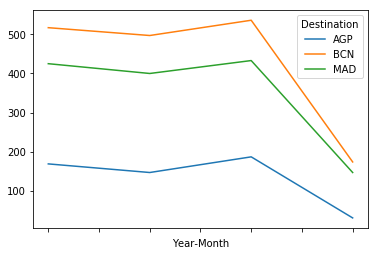

In [79]:
#s=pd.read_csv('./searches_sample.csv.bz2', sep='^', usecols=['Date', 'Destination'])
s=pd.read_csv('./searches.csv.bz2', sep='^', usecols=['Date', 'Destination'], nrows=100000)



s=s.dropna()
s=s[ s['Destination'].isin(['MAD', 'AGP', 'BCN'])    ]
s['Year-Month']=s['Date'].str[0:7]
del s['Date']
s['Searches']=1
s_grouped=s.groupby(['Destination', 'Year-Month'])
s_grouped=s_grouped.count().reset_index()



A=s_grouped.pivot("Year-Month", "Destination","Searches")
A.plot()

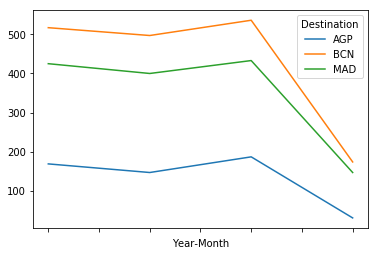

In [88]:
#s=pd.read_csv('./searches_sample.csv.bz2', sep='^', usecols=['Date', 'Destination'])
sc=pd.read_csv('./searches.csv.bz2', sep='^', usecols=['Date', 'Destination'], nrows=100000, chunksize=10000)

sum_all_chunks=pd.DataFrame()

for i, chunk in enumerate(sc):   
    s=chunk.dropna()
    s=s[ s['Destination'].isin(['MAD', 'AGP', 'BCN'])    ]
    s['Year-Month']=s['Date'].str[0:7]
    del s['Date']
    s['Searches']=1
    s_grouped=s.groupby(['Destination', 'Year-Month'])
    s_grouped=s_grouped.count().reset_index()
    sum_all_chunks=sum_all_chunks.append(s_grouped)

final=sum_all_chunks.groupby(['Destination', 'Year-Month']).sum().reset_index()
A=final.pivot("Year-Month", "Destination","Searches")
A.plot()

In [84]:
sum_all_chunks.shape

(36, 3)

In [85]:
sum_all_chunks

,Destination,Year-Month,Searches
0,AGP,2013-01,48
1,BCN,2013-01,162
2,MAD,2013-01,125
0,AGP,2013-01,60
1,BCN,2013-01,156
2,MAD,2013-01,141
0,AGP,2013-01,56
1,BCN,2013-01,180
2,MAD,2013-01,148
0,AGP,2013-01,5


In [87]:
final.head()

,Destination,Year-Month,Searches
0,AGP,2013-01,169
1,AGP,2013-02,147
2,AGP,2013-03,187
3,AGP,2013-04,31
4,BCN,2013-01,517


In [89]:
sin_reset=sum_all_chunks.groupby(['Destination', 'Year-Month']).sum()

In [90]:
type(sin_reset)

pandas.core.frame.DataFrame

In [91]:
sin_reset.index

MultiIndex(levels=[['AGP', 'BCN', 'MAD'], ['2013-01', '2013-02', '2013-03', '2013-04']],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]],
           names=['Destination', 'Year-Month'])

In [92]:
sin_reset.head()

Searches
Destination Year-Month          
AGP         2013-01          169
            2013-02          147
            2013-03          187
            2013-04           31
BCN         2013-01          517

Ready to go to big file

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
CPU times: user 5min 25s, sys: 1.87 s, total: 5min 27s
Wall time: 5min 29s


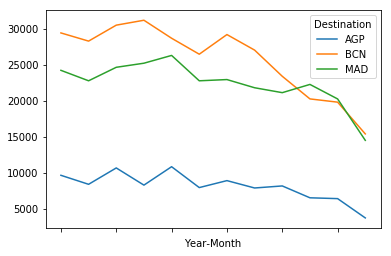

In [94]:
%%time
#s=pd.read_csv('./searches_sample.csv.bz2', sep='^', usecols=['Date', 'Destination'])
sc=pd.read_csv('./searches.csv.bz2', sep='^', usecols=['Date', 'Destination'], chunksize=300000)

sum_all_chunks=pd.DataFrame()

for i, chunk in enumerate(sc):   
    print(i)
    s=chunk.dropna()
    s=s[ s['Destination'].isin(['MAD', 'AGP', 'BCN'])    ]
    s['Year-Month']=s['Date'].str[0:7]
    del s['Date']
    s['Searches']=1
    s_grouped=s.groupby(['Destination', 'Year-Month'])
    s_grouped=s_grouped.count().reset_index()
    sum_all_chunks=sum_all_chunks.append(s_grouped)

final=sum_all_chunks.groupby(['Destination', 'Year-Month']).sum().reset_index()
A=final.pivot("Year-Month", "Destination","Searches")
A.plot()

In [95]:
print(A)

Destination    AGP    BCN    MAD
Year-Month                      
2013-01       9633  29469  24258
2013-02       8379  28329  22800
2013-03      10659  30552  24681
2013-04       8265  31236  25251
2013-05      10830  28728  26334
2013-06       7923  26505  22800
2013-07       8892  29241  22971
2013-08       7866  27075  21831
2013-09       8151  23427  21147
2013-10       6499  20276  22294
2013-11       6384  19824  20272
2013-12       3696  15400  14504
